In [57]:
import numpy as np


In [58]:

Y = np.array([
    [4, 0, 2],
    [5, 3, 0],
    [0, 4, 1],
    [5, 3, 3],
    [1, 1, 0],
    [0, 2, 4],
    [3, 1, 5],
    [2, 0, 3]
])

R = np.where(Y == 0, 0, 1)

# Calculate the mean value of Y excluding the 0s
mean_value = np.mean(Y[Y != 0])
print(mean_value)

Y_norm = Y - mean_value
print(Y_norm)

2.888888888888889
[[ 1.11111111 -2.88888889 -0.88888889]
 [ 2.11111111  0.11111111 -2.88888889]
 [-2.88888889  1.11111111 -1.88888889]
 [ 2.11111111  0.11111111  0.11111111]
 [-1.88888889 -1.88888889 -2.88888889]
 [-2.88888889 -0.88888889  1.11111111]
 [ 0.11111111 -1.88888889  2.11111111]
 [-0.88888889 -2.88888889  0.11111111]]


In [59]:
import numpy as np
from scipy import optimize

def grad_reg_func(params, Y, R, n_produits, n_utilisateurs, n):
    X = params[:n_produits * n].reshape(n_produits, n)
    Theta = params[n_produits * n:].reshape(n_utilisateurs, n)
    
    error = np.dot(X, Theta.T) * R - Y
    X_grad = np.dot(error, Theta)
    Theta_grad = np.dot(error.T, X)
    
    X_grad_reg = X_grad + lambda_val * X
    Theta_grad_reg = Theta_grad + lambda_val * Theta
    
    grad = np.concatenate((X_grad_reg.flatten(), Theta_grad_reg.flatten()))
    return grad

def cost_reg_func(params, Y, R, n_produits, n_utilisateurs, n):
    X = params[:n_produits * n].reshape(n_produits, n)
    Theta = params[n_produits * n:].reshape(n_utilisateurs, n)
    
    error = np.dot(X, Theta.T) * R - Y
    J = 0.5 * np.sum(error**2)
    
    reg_term = 0.5 * lambda_val * (np.sum(Theta**2) + np.sum(X**2))
    J_reg = J + reg_term
    
    return J_reg

# Set the lambda regularization parameter
lambda_val = 0.1

In the above code, we define the grad_reg_func and cost_reg_func functions, which represent the gradient function and cost function, respectively. These functions take the parameters params, the data matrix Y, the binary mask R, the number of products n_produits, the number of users n_utilisateurs, and the number of features n. The gradient function computes the gradients of the cost function with respect to the parameters X and Theta, while the cost function computes the regularized cost.

Next, we'll perform collaborative filtering using the fmin_cg function and calculate the prediction matrix:

In [62]:
n_produits = Y.shape[0]
n_utilisateurs = Y.shape[1]
n = 2

# Initialize random parameter values
X_initial = np.random.randn(n_produits, n)
Theta_initial = np.random.randn(n_utilisateurs, n)
params_initial = np.concatenate((X_initial.flatten(), Theta_initial.flatten()))

# Optimize using fmin_cg
optimized_params = optimize.fmin_cg(cost_reg_func, params_initial, fprime=grad_reg_func,
                                    args=(Y, R, n_produits, n_utilisateurs, n), maxiter=100)

# y_norm
optimized_params_2 = optimize.fmin_cg(cost_reg_func, params_initial, fprime=grad_reg_func,
                                    args=(Y_norm, R, n_produits, n_utilisateurs, n), maxiter=10000)

# Extract optimized X and Theta values from the parameters
X_optimized = optimized_params[:n_produits * n].reshape(n_produits, n)
Theta_optimized = optimized_params[n_produits * n:].reshape(n_utilisateurs, n)

# Calculate the prediction matrix
prediction_matrix = np.dot(X_optimized, Theta_optimized.T)

         Current function value: 1.935236
         Iterations: 100
         Function evaluations: 157
         Gradient evaluations: 157
         Current function value: 45.456269
         Iterations: 2
         Function evaluations: 51
         Gradient evaluations: 40


In the code above, we first initialize random parameter values for X and Theta. Then, we use the optimize.fmin_cg function to optimize the cost function cost_reg_func using the gradient function grad_reg_func. The args parameter is used to pass additional arguments (Y, R, n_produits, n_utilisateurs, n) to the cost and gradient functions. We set maxiter to limit the maximum number of iterations for optimization.

Finally, we'll calculate the RMSE error and print it:

In [63]:
# Calculate RMSE error
error_matrix = (prediction_matrix - Y) * R
squared_error = np.sum(error_matrix**2)
mse = squared_error / np.sum(R)
rmse = np.sqrt(mse)

print("RMSE error: ", rmse)

RMSE error:  0.04064767316787302


In [6]:
Y

array([[4, 0, 2],
       [5, 3, 0],
       [0, 4, 1],
       [5, 3, 3],
       [1, 1, 0],
       [0, 2, 4],
       [3, 1, 5],
       [2, 0, 3]])

Let's suppose we add a new user (new column).
What is the recommendation for this new user about the 5th product (line)?



In [16]:
# Add the new user's ratings to the data matrix Y
#new_user_ratings = np.array([4, 0, 3])  # Assuming the new user's ratings for the existing products
new_user_ratings =  np.full(n_produits, mean_value)
Y_with_new_user = np.hstack((Y, new_user_ratings.reshape(-1, 1)))
Y_with_new_user

array([[4.        , 0.        , 2.        , 2.88888889],
       [5.        , 3.        , 0.        , 2.88888889],
       [0.        , 4.        , 1.        , 2.88888889],
       [5.        , 3.        , 3.        , 2.88888889],
       [1.        , 1.        , 0.        , 2.88888889],
       [0.        , 2.        , 4.        , 2.88888889],
       [3.        , 1.        , 5.        , 2.88888889],
       [2.        , 0.        , 3.        , 2.88888889]])

In [17]:

# Update the number of users
n_utilisateurs = Y_with_new_user.shape[1]

# Initialize random parameter values for the new user
Theta_new_user_initial = np.random.randn(1, n)
Theta_new_user_initial

array([[ 0.49646935, -0.26418711]])

In [23]:

# Concatenate the initial parameters with the new user's parameters
params_initial_with_new_user = np.concatenate((optimized_params, Theta_new_user_initial.flatten()))
params_initial_with_new_user

# Update the shape of R to match Y_with_new_user
R_with_new_user = np.hstack((R, np.ones((n_produits, 1))))

# Initialize random parameter values for the new user
Theta_new_user_initial = np.random.randn(1, n)

In [21]:
print(params_initial_with_new_user.shape)
print(Y_with_new_user.shape)
print(R.shape)

(24,)
(8, 4)
(8, 3)


In [24]:

# Optimize using fmin_cg with the new user's data
optimized_params_with_new_user = optimize.fmin_cg(cost_reg_func, params_initial_with_new_user, fprime=grad_reg_func,
                                                  args=(Y_with_new_user, R_with_new_user, n_produits, n_utilisateurs, n), maxiter=100)

optimized_params_with_new_user

Optimization terminated successfully.
         Current function value: 3.047806
         Iterations: 60
         Function evaluations: 104
         Gradient evaluations: 104


array([ 0.47853955,  1.35066324,  0.41086709,  1.65884804, -0.15141955,
        2.21405763,  0.68194245,  1.59457118,  1.75017871,  0.18347699,
        1.2333551 ,  0.93133386,  1.64444594,  0.64976844,  1.0626729 ,
        0.60395333,  0.43579182,  2.86995741,  0.18673557,  1.77032346,
        2.66291507,  0.64842758,  1.40978096,  1.38488693])

In [26]:

# Extract optimized Theta values including the new user's parameters
Theta_optimized_with_new_user = optimized_params_with_new_user[n_produits * n:].reshape(n_utilisateurs, n)
print("[Theta_optimized_with_new_user]: ")
print(Theta_optimized_with_new_user)

# Calculate the prediction for the new user and the 5th product
new_user_index = n_utilisateurs - 1  # Index of the new user in the Theta_optimized_with_new_user matrix
product_index = 4  # Index of the 5th product in the Y matrix (zero-based index)

prediction_new_user_5th_product = np.dot(X_optimized[product_index], Theta_optimized_with_new_user[new_user_index])

print ("prediction recommendation 5th product for the new user: ")
print(prediction_new_user_5th_product)

[Theta_optimized_with_new_user]: 
[[0.43579182 2.86995741]
 [0.18673557 1.77032346]
 [2.66291507 0.64842758]
 [1.40978096 1.38488693]]
prediction recommendation 5th product for the new user: 
0.20978755055902287


how find the nearest neighbour of the first product (first line)?
I need a scatterplot graph and a nalytic answer

ChatGPT
To find the nearest neighbor of the first product (first line) using collaborative filtering, you can calculate the similarity between the first product and all other products. The product with the highest similarity will be considered the nearest neighbor.

Here's how you can find the nearest neighbor and create a scatter plot:

In [27]:
import numpy as np
import matplotlib.pyplot as plt

In [28]:
def calculate_similarity(product1, product2):
    # Calculate the cosine similarity between two products
    dot_product = np.dot(product1, product2)
    norm_product1 = np.linalg.norm(product1)
    norm_product2 = np.linalg.norm(product2)
    similarity = dot_product / (norm_product1 * norm_product2)
    return similarity

In [51]:
# Calculate the similarity between the first product and all other products
first_product = Y[0]

idx_comparing_prod = 4
comparing_prod = Y[idx_comparing_prod]

similarities = []
product_indices = []

for i, product in enumerate(Y):
    if i == idx_comparing_prod:
        continue
    similarity = calculate_similarity(comparing_prod, product)
    similarities.append(similarity)
    product_indices.append(i)

# Find the index of the nearest neighbor
nearest_neighbor_index = np.argmax(similarities)
print("nearest neighbor: ")
print(nearest_neighbor_index)
print(len(product_indices))
print(len(similarities))
print(product_indices)
print(similarities)

nearest neighbor: 
1
7
7
[0, 1, 2, 3, 5, 6, 7]
[0.6324555320336759, 0.9701425001453319, 0.6859943405700353, 0.8626621856275073, 0.31622776601683794, 0.47809144373375745, 0.39223227027636803]


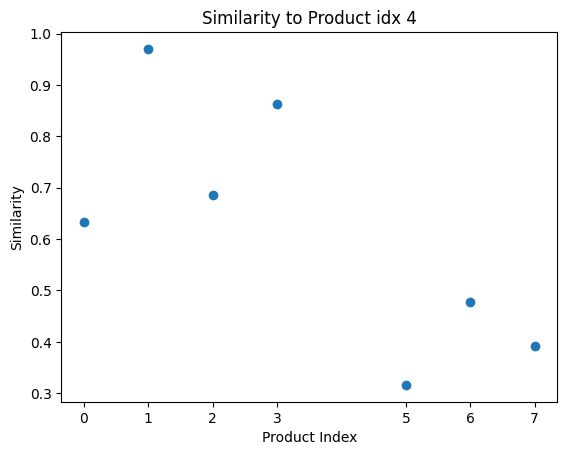

Nearest Neighbor of product 4: is Product:  1


In [56]:
# Scatter plot
#x = np.arange(n_utilisateurs)
plt.scatter(product_indices, similarities)
plt.xlabel('Product Index')
plt.ylabel('Similarity')
plt.title('Similarity to Product idx ' + str(idx_comparing_prod) )
plt.xticks(product_indices)
plt.show()

# Analytic answer
print("Nearest Neighbor of product " + str(idx_comparing_prod) +": is Product: ", nearest_neighbor_index )